# Prototype data exploration

# Explore clean ds  

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('../data/interim/clean_ds.csv')

In [32]:
df.head()

,aggregated1,aggregated2,granular1,granular2,granular3,granular4,granular5,id
0,8.00,9.00,8.00,8.00,9.00,8.00,8.00,1
1,6.67,8.33,6.00,7.67,7.00,7.00,6.67,2
2,5.33,4.33,6.33,4.00,6.33,4.33,6.67,3
3,7.67,8.33,7.67,8.33,6.67,7.67,8.67,4
4,7.00,8.33,7.67,8.00,9.00,7.67,8.33,5


In [33]:
aggregated_cols = ['aggregated1', 'aggregated2']
granular_cols = ['granular1', 'granular2', 'granular3', 'granular4', 'granular5']

stats = {}
for col in aggregated_cols + granular_cols:
    mean = df[col].mean()
    std = df[col].std()
    stats[col] = {'mean': mean, 'std': std}

stats



{'aggregated1': {'mean': np.float64(6.89953488372093),
  'std': np.float64(1.4337911010231585)},
 'aggregated2': {'mean': np.float64(7.325813953488372),
  'std': np.float64(1.7514323832606264)},
 'granular1': {'mean': np.float64(6.976744186046512),
  'std': np.float64(1.1185465078144783)},
 'granular2': {'mean': np.float64(7.612558139534883),
  'std': np.float64(1.3935687196192437)},
 'granular3': {'mean': np.float64(6.984186046511628),
  'std': np.float64(1.3131065175633434)},
 'granular4': {'mean': np.float64(7.318604651162792),
  'std': np.float64(1.2345108562761065)},
 'granular5': {'mean': np.float64(7.573488372093024),
  'std': np.float64(1.3178895172295277)}}

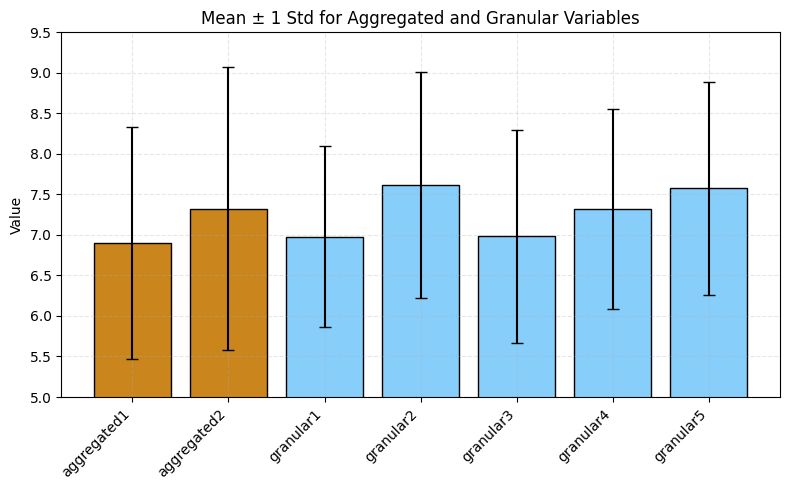

In [35]:
# --- Convert to DataFrame ---
stats_df = pd.DataFrame(stats).T  # rows = features, columns = mean, std

# --- Plot ---
plt.figure(figsize=(8, 5))
colors = ["#ca851dff" if 'aggregated' in col else '#87cefa' for col in stats_df.index]
plt.bar(stats_df.index, stats_df['mean'], yerr=stats_df['std'], capsize=4, color=colors, edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value')
plt.ylim((5,9.5))
plt.title('Mean ± 1 Std for Aggregated and Granular Variables')
plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

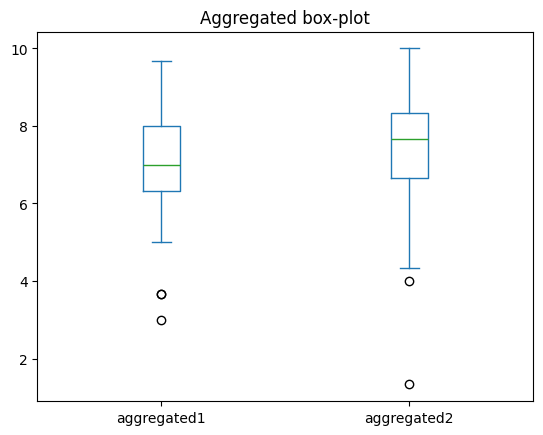

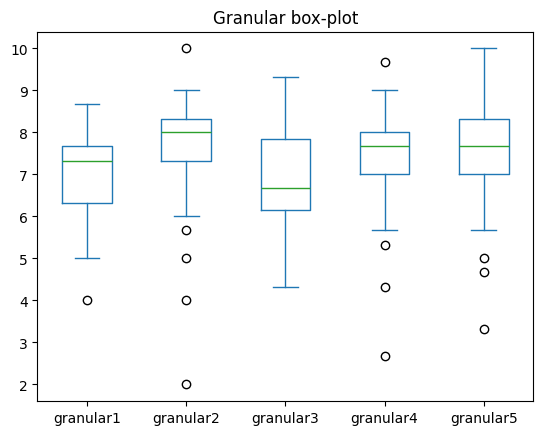

In [36]:
df[aggregated_cols].plot.box()
plt.title("Aggregated box-plot")
plt.show()

df[granular_cols].plot.box()
plt.title("Granular box-plot")
plt.show()

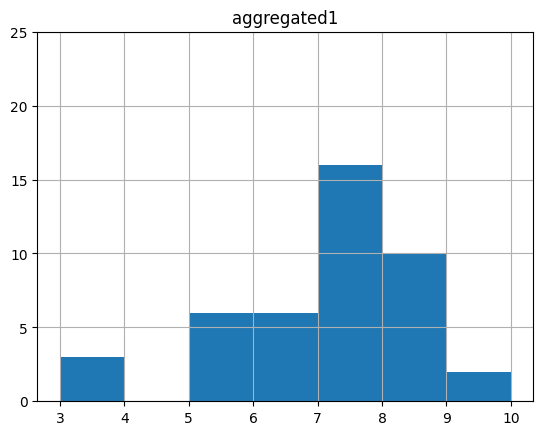

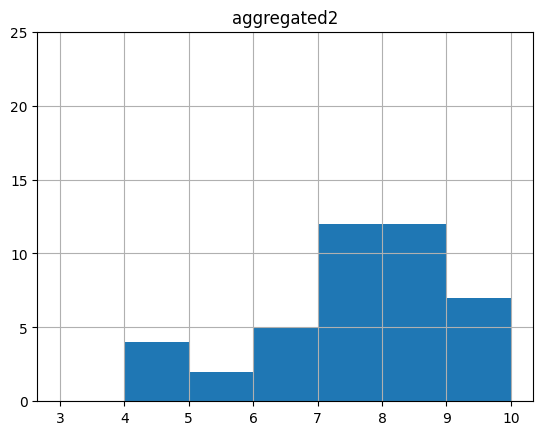

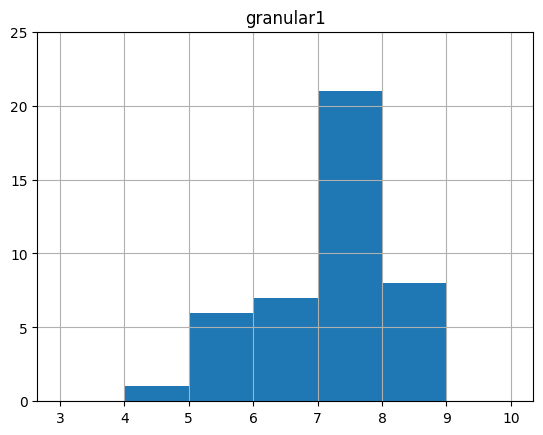

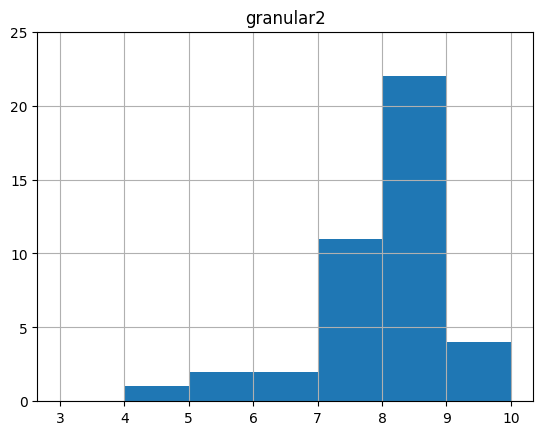

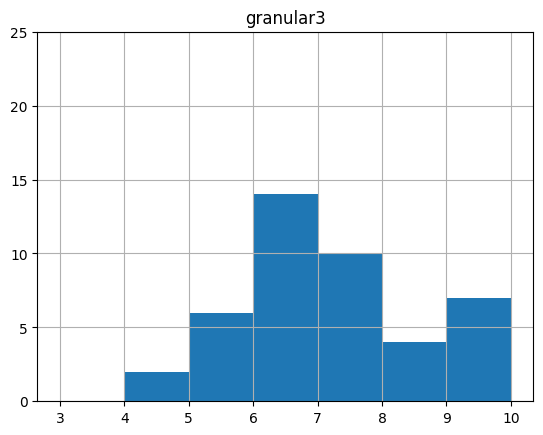

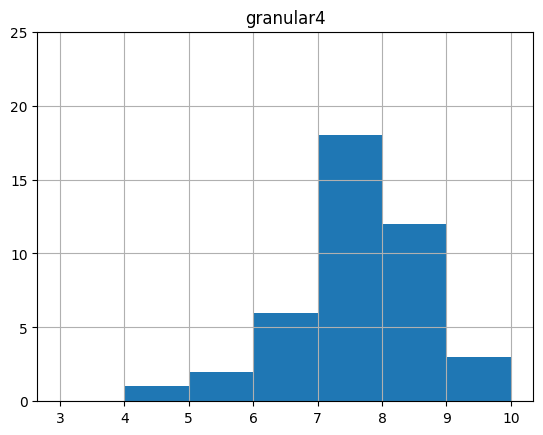

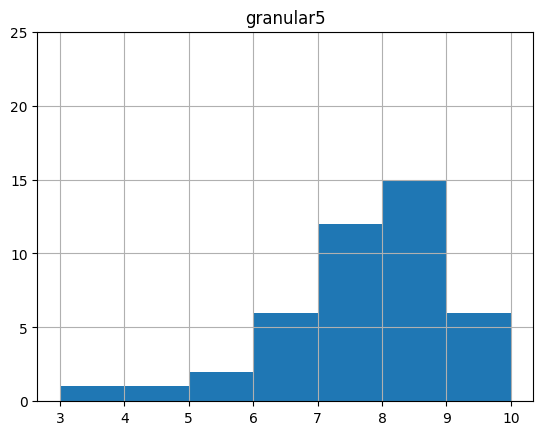

In [53]:
bins = [i for i in range(3,11)]
for col in aggregated_cols:
    df.hist(column = col, bins = bins)
    plt.ylim(0, 25)
    plt.show()

bins = [i for i in range(3,11)]
for col in granular_cols:
    df.hist(column = col, bins = bins)
    plt.ylim(0,25)
    plt.show()

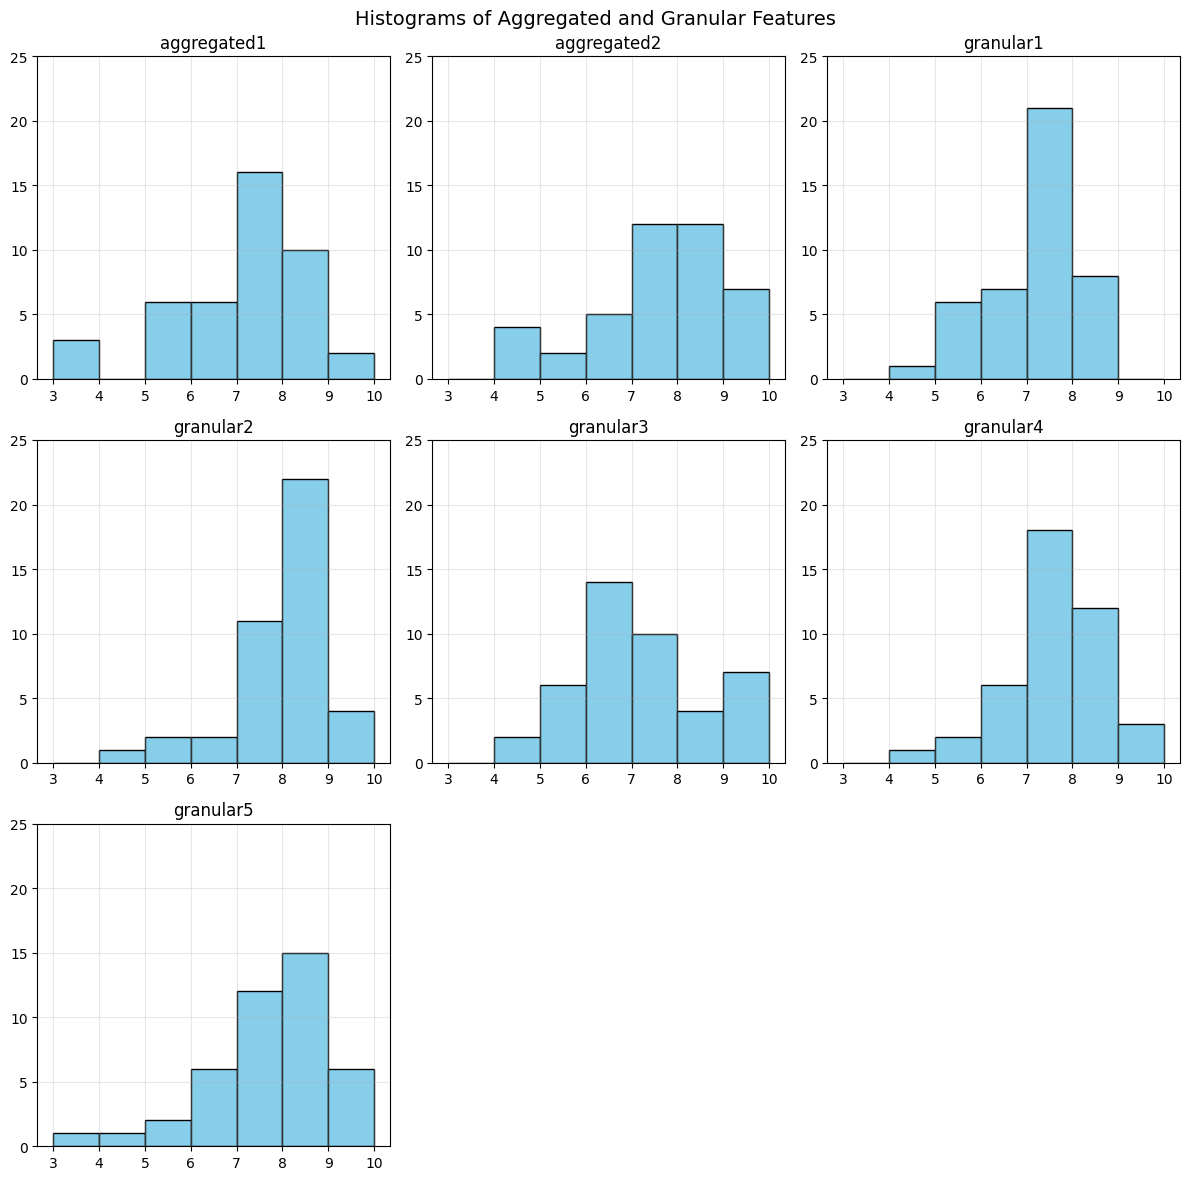

In [ ]:
import matplotlib.pyplot as plt

bins = [i for i in range(3, 11)]
all_cols = aggregated_cols + granular_cols

# --- Define subplot grid ---
n_cols = 3
n_rows = (len(all_cols) + n_cols - 1) // n_cols  # automatic rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

# --- Plot each histogram in a subplot ---
for i, col in enumerate(all_cols):
    df[col].hist(bins=bins, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylim(0, 25)
    axes[i].grid(alpha=0.3)

# --- Hide any unused axes ---
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histograms of Aggregated and Granular Features", fontsize=14)
plt.tight_layout()
plt.show()


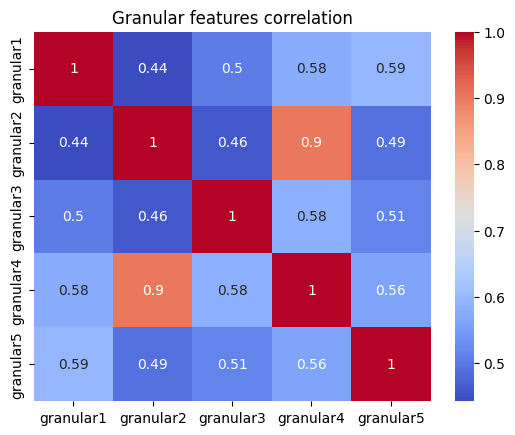

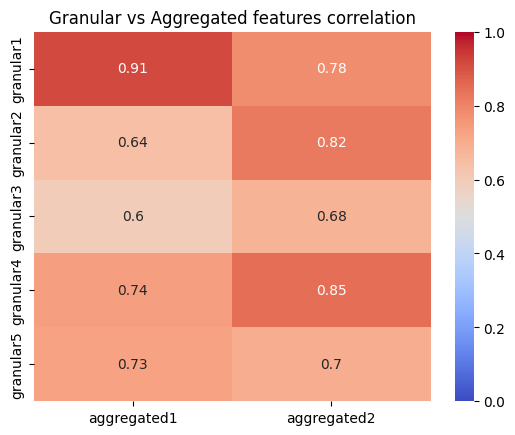

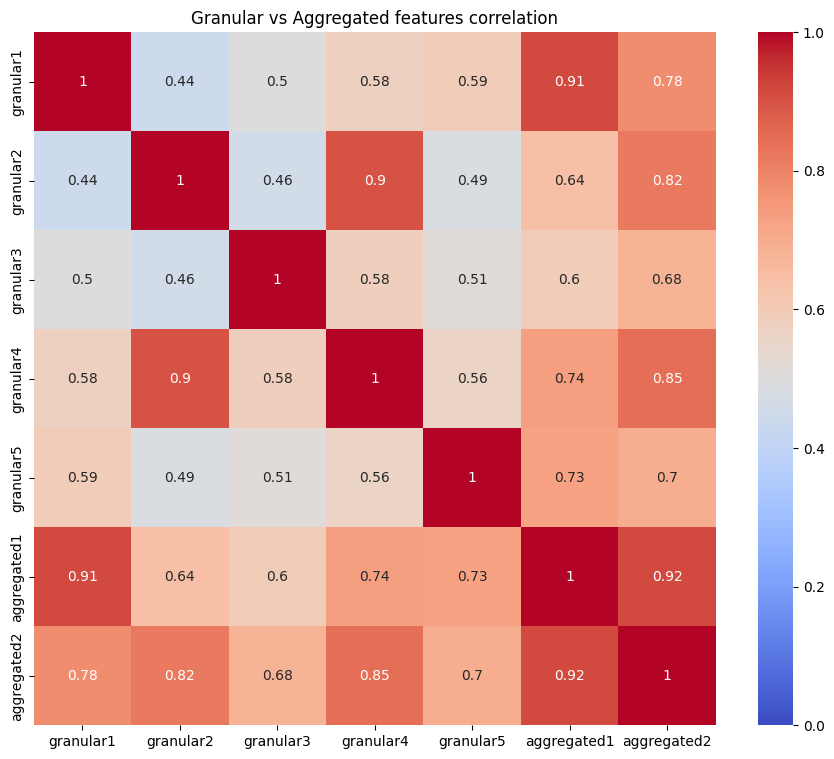

In [56]:
import seaborn as sns 

sns.heatmap(df[granular_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Granular features correlation')
plt.show()

# corr between granular and aggregated
sns.heatmap(df[granular_cols + aggregated_cols].corr().loc[granular_cols, aggregated_cols], annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Granular vs Aggregated features correlation')
plt.show()

# corr between granular and aggregated
plt.figure(figsize=(11,9))
sns.heatmap(df[granular_cols + aggregated_cols].corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Granular vs Aggregated features correlation')
plt.show()